In [1]:
import torch
from torchinfo import summary
import matplotlib.pyplot as plt

import numpy as np
import sys
sys.path.insert(0, '../scripts') # add 'scrips' subfolder to sys path for easier import 
from Dataset import get_cifar10, get_cifar100, CIFAR100_Fine_labels, CIFAR10_labels
from Dataset import ImageNetDataset, ConvertToPlotableImage
from Models import get_Model
from Utils import train, evaluate

# ImageNet-1k Dataset

In [2]:
# create datasets 
ImgNet_train = ImageNetDataset('train', Dataset_dir = '/home/chitraz/Documents/UoS_MSc/EEEM056_Project/Experiments/ILSVRC12')
ImgNet_valid = ImageNetDataset('val', Dataset_dir = '/home/chitraz/Documents/UoS_MSc/EEEM056_Project/Experiments/ILSVRC12')
ImgNet_test = ImageNetDataset('test', Dataset_dir = '/home/chitraz/Documents/UoS_MSc/EEEM056_Project/Experiments/ILSVRC12')

print('{} train samples. {} valid samples. {} test samples'.format(len(ImgNet_train), len(ImgNet_valid), len(ImgNet_test)))

1281167 train samples. 50000 valid samples. 100000 test samples


### Plot a NxM grid of ImageNet valid samples

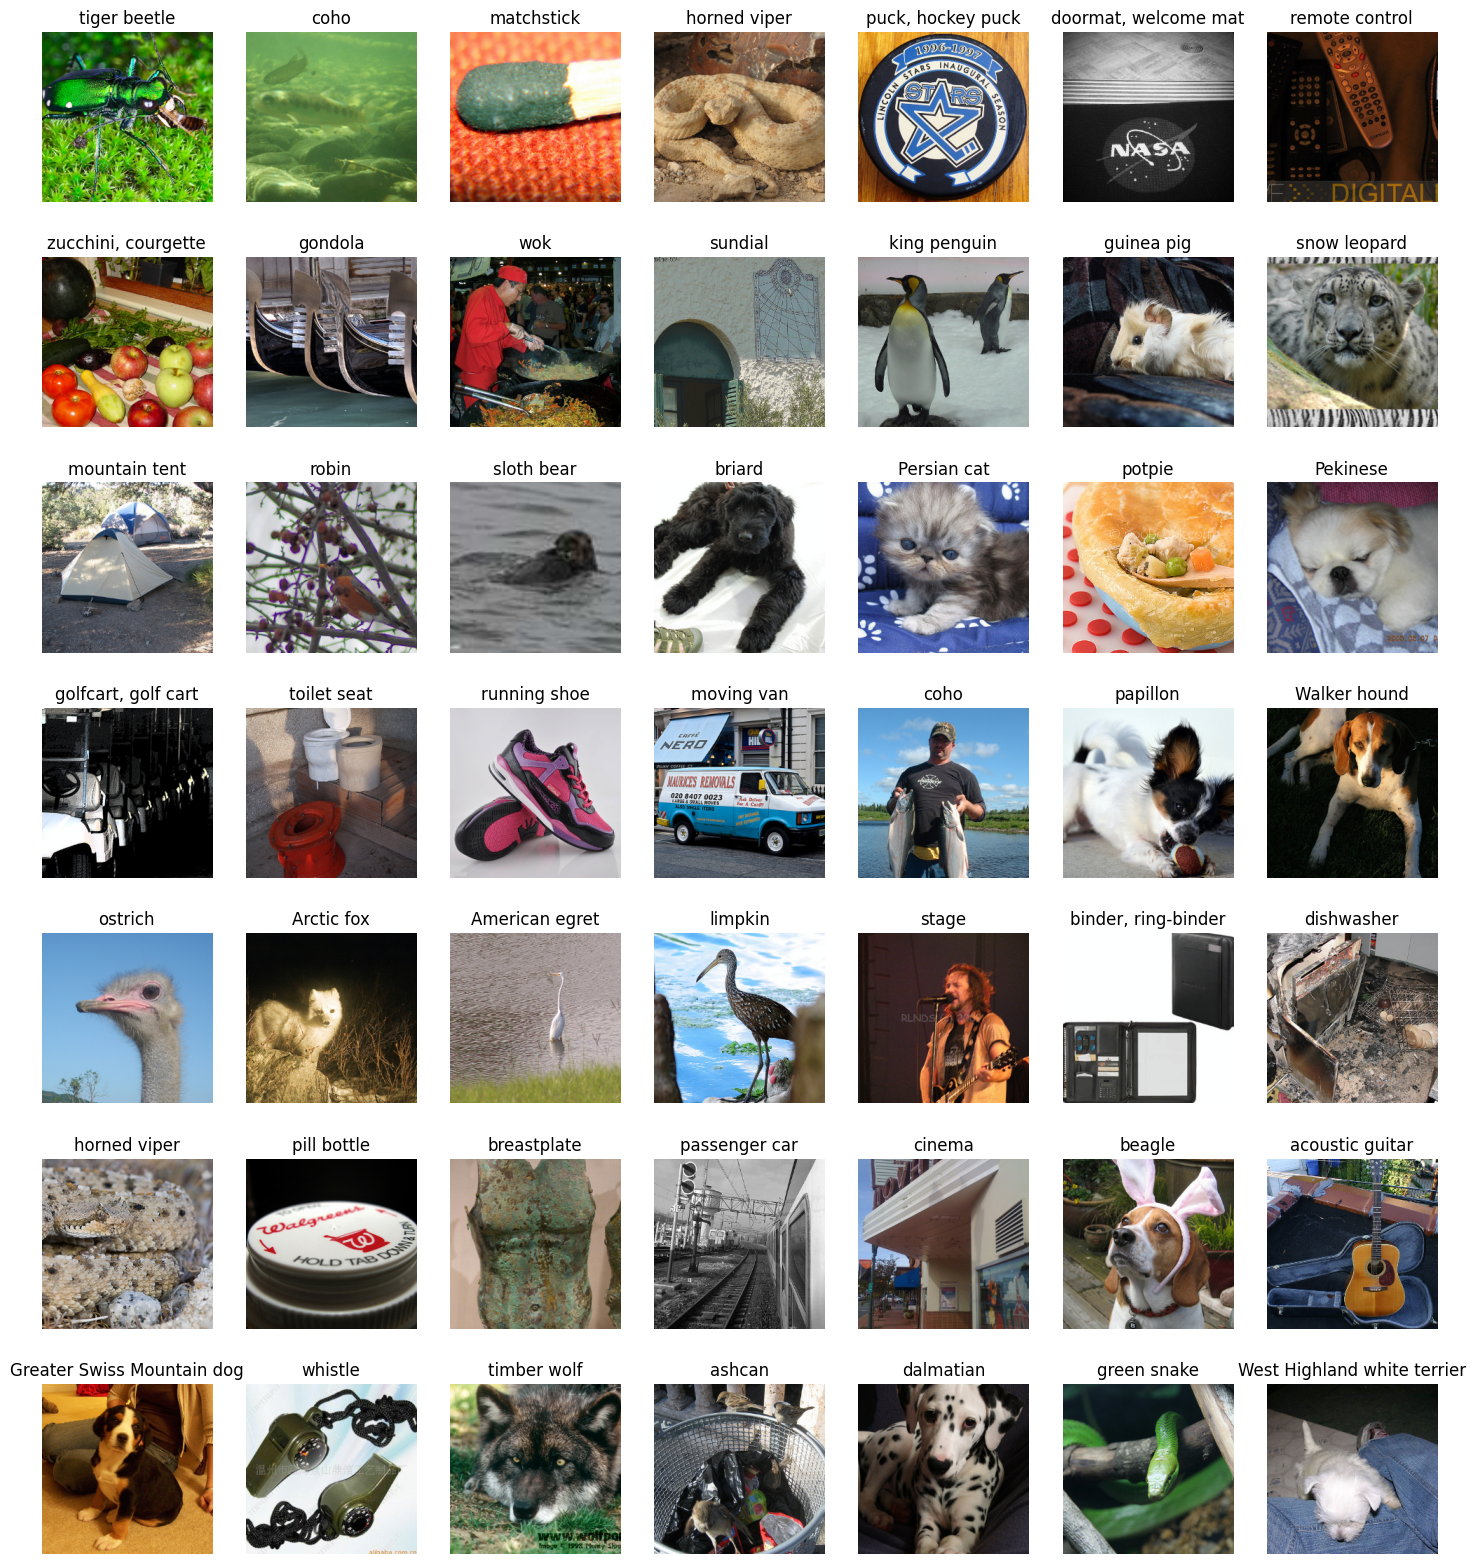

In [25]:
N = 7
M = 7
size = (18,20)

fig, axs = plt.subplots(M, N, figsize=size)
for i in range(M):
    for j in range(N):
        # random image index 
        rand_idx = np.random.randint(len(ImgNet_valid)-1)
        
        # get a sample from valid set
        img, GT, _ = ImgNet_valid[rand_idx]
        synid = ImgNet_valid.MAP_int_synsetID[int(GT)] 
        descript = ImgNet_valid.MAP_synsetID_words[synid]
        img = ConvertToPlotableImage(img, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        
        # plot 
        axs[i,j].imshow(img)

        if len(descript) > 20: # if class description too long, clip it
            words = descript.split(',')
            axs[i,j].set_title(words[0])
        else:
            axs[i,j].set_title(descript)
        
        axs[i,j].axis('off')

### Plot a NxM grid of ImageNet train samples

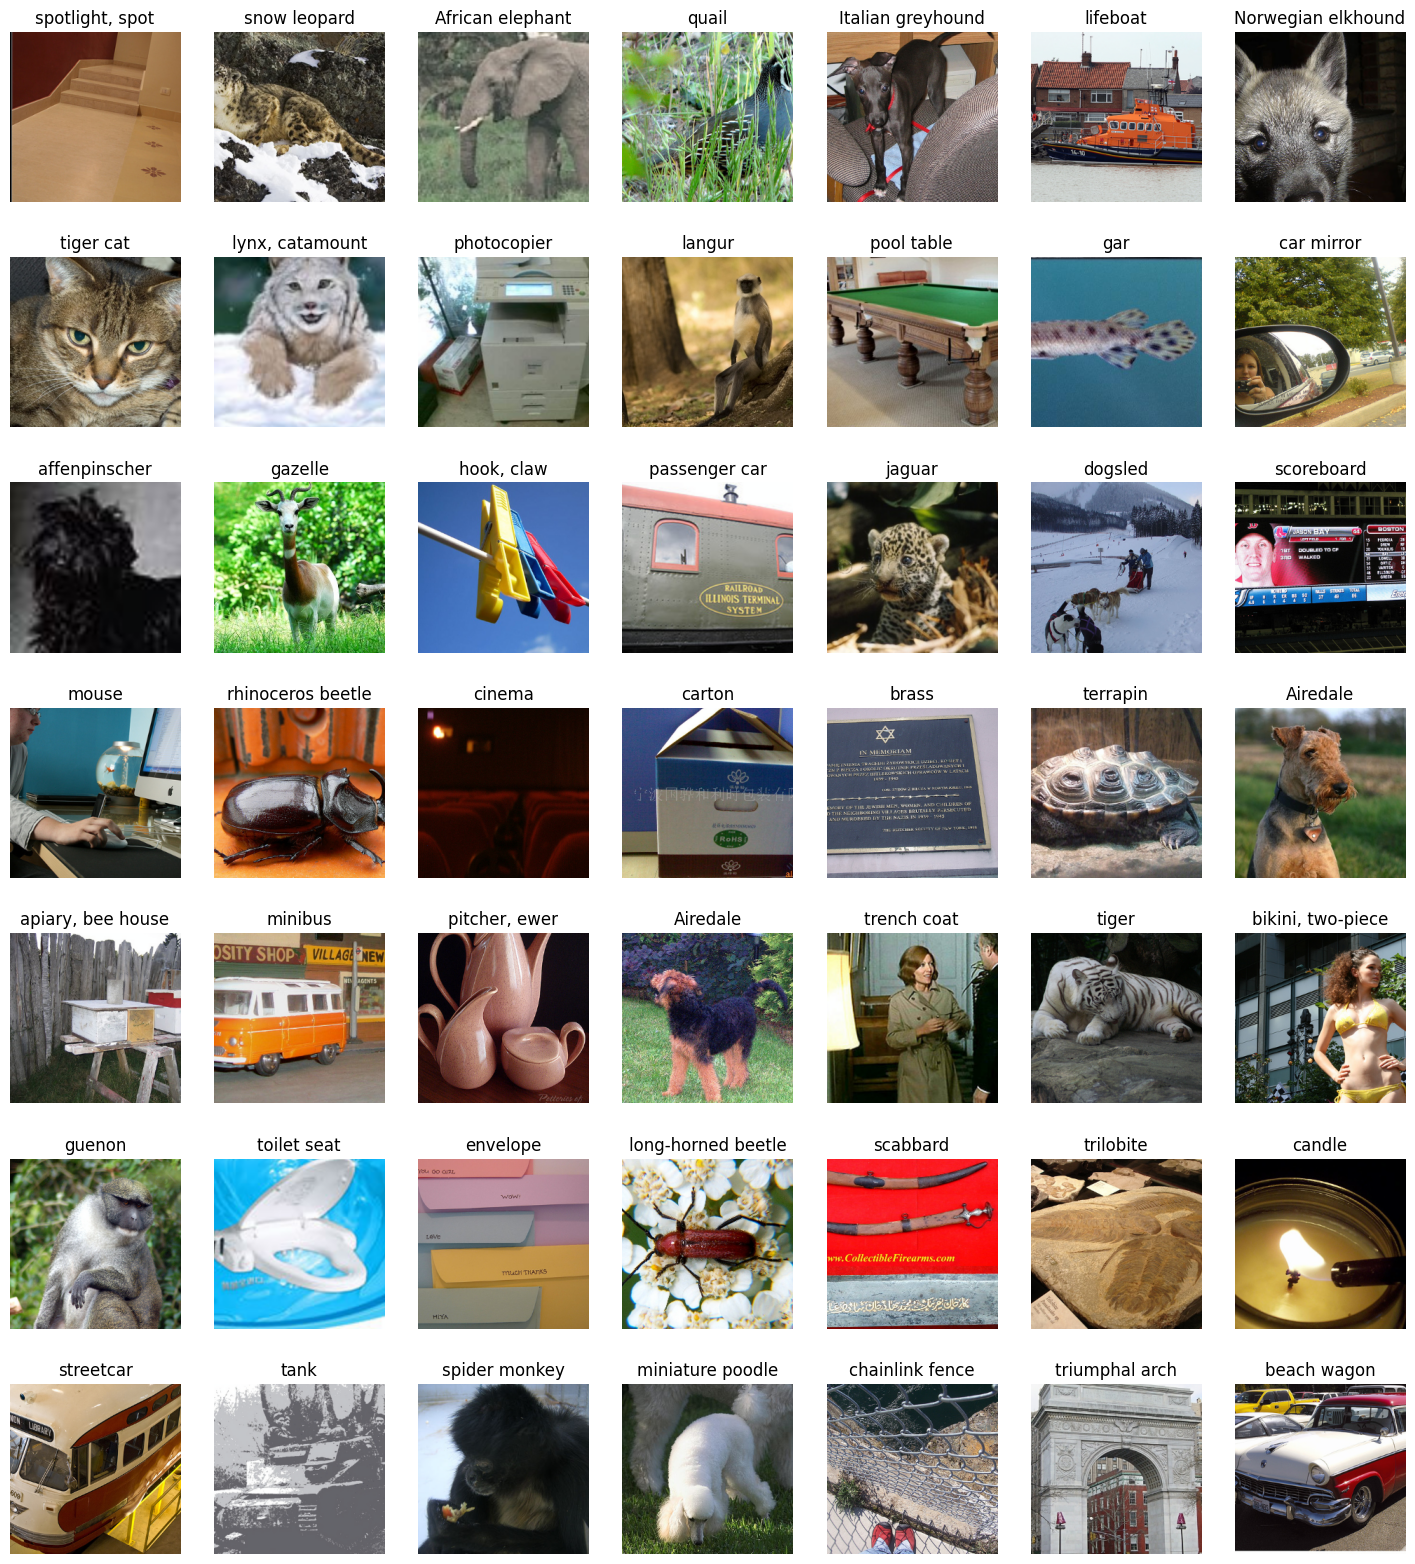

In [26]:
N = 7
M = 7
size = (18,20)

fig, axs = plt.subplots(M, N, figsize=size)
for i in range(M):
    for j in range(N):
        # random image index 
        rand_idx = np.random.randint(len(ImgNet_train)-1)
        
        # get a sample from train set
        img, GT, _ = ImgNet_train[rand_idx]
        synid = ImgNet_train.MAP_int_synsetID[int(GT)] 
        descript = ImgNet_train.MAP_synsetID_words[synid]
        img = ConvertToPlotableImage(img, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        
        # plot 
        axs[i,j].imshow(img)
        if len(descript) > 20: # if class description too long, clip it
            words = descript.split(',')
            axs[i,j].set_title(words[0])
        else:
            axs[i,j].set_title(descript)
        axs[i,j].axis('off')

# Load CIFAR-10 Dataset

In [3]:
# create datasets 
Cifar10_train = get_cifar10('train', Dataset_dir = '/home/chitraz/Documents/UoS_MSc/EEEM056_Project/Experiments/dataset')
Cifar10_test = get_cifar10('test', Dataset_dir = '/home/chitraz/Documents/UoS_MSc/EEEM056_Project/Experiments/dataset')


print('{} train samples. {} test samples'.format(len(Cifar10_train), len(Cifar10_test)))


50000 train samples. 10000 test samples


### Plot a NxM grid of CIFAR-10 test samples

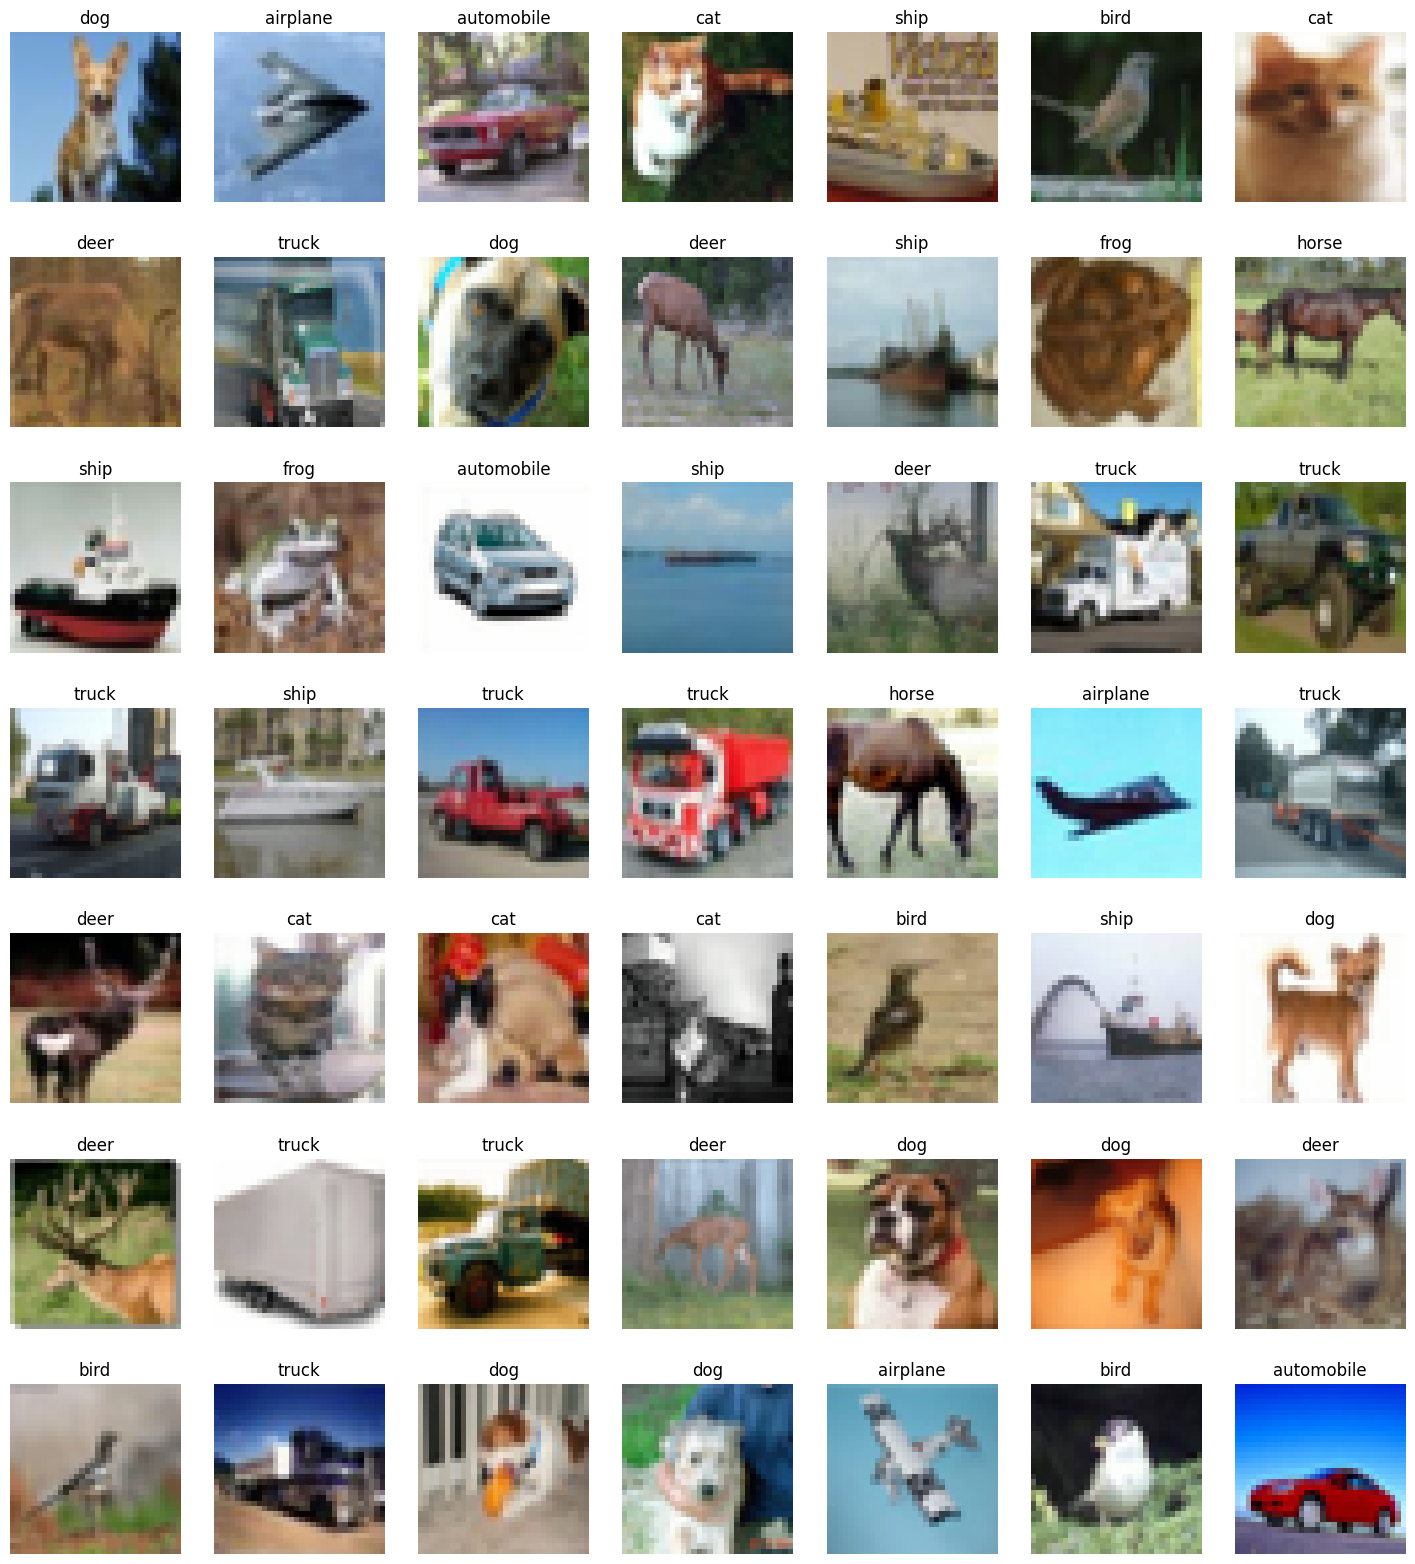

In [4]:
N = 7
M = 7
size = (18,20)

fig, axs = plt.subplots(M, N, figsize=size)
for i in range(M):
    for j in range(N):
        # random image index 
        rand_idx = np.random.randint(len(Cifar10_test)-1)
        
        # get a sample from train set
        img, GT, _ = Cifar10_test[rand_idx]
        class_name = CIFAR10_labels[GT]
        img = ConvertToPlotableImage(img, [0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]) 
        
        # plot 
        axs[i,j].imshow(img)
        axs[i,j].set_title(class_name)
        axs[i,j].axis('off')

### Plot a NxM grid of CIFAR-10 train samples

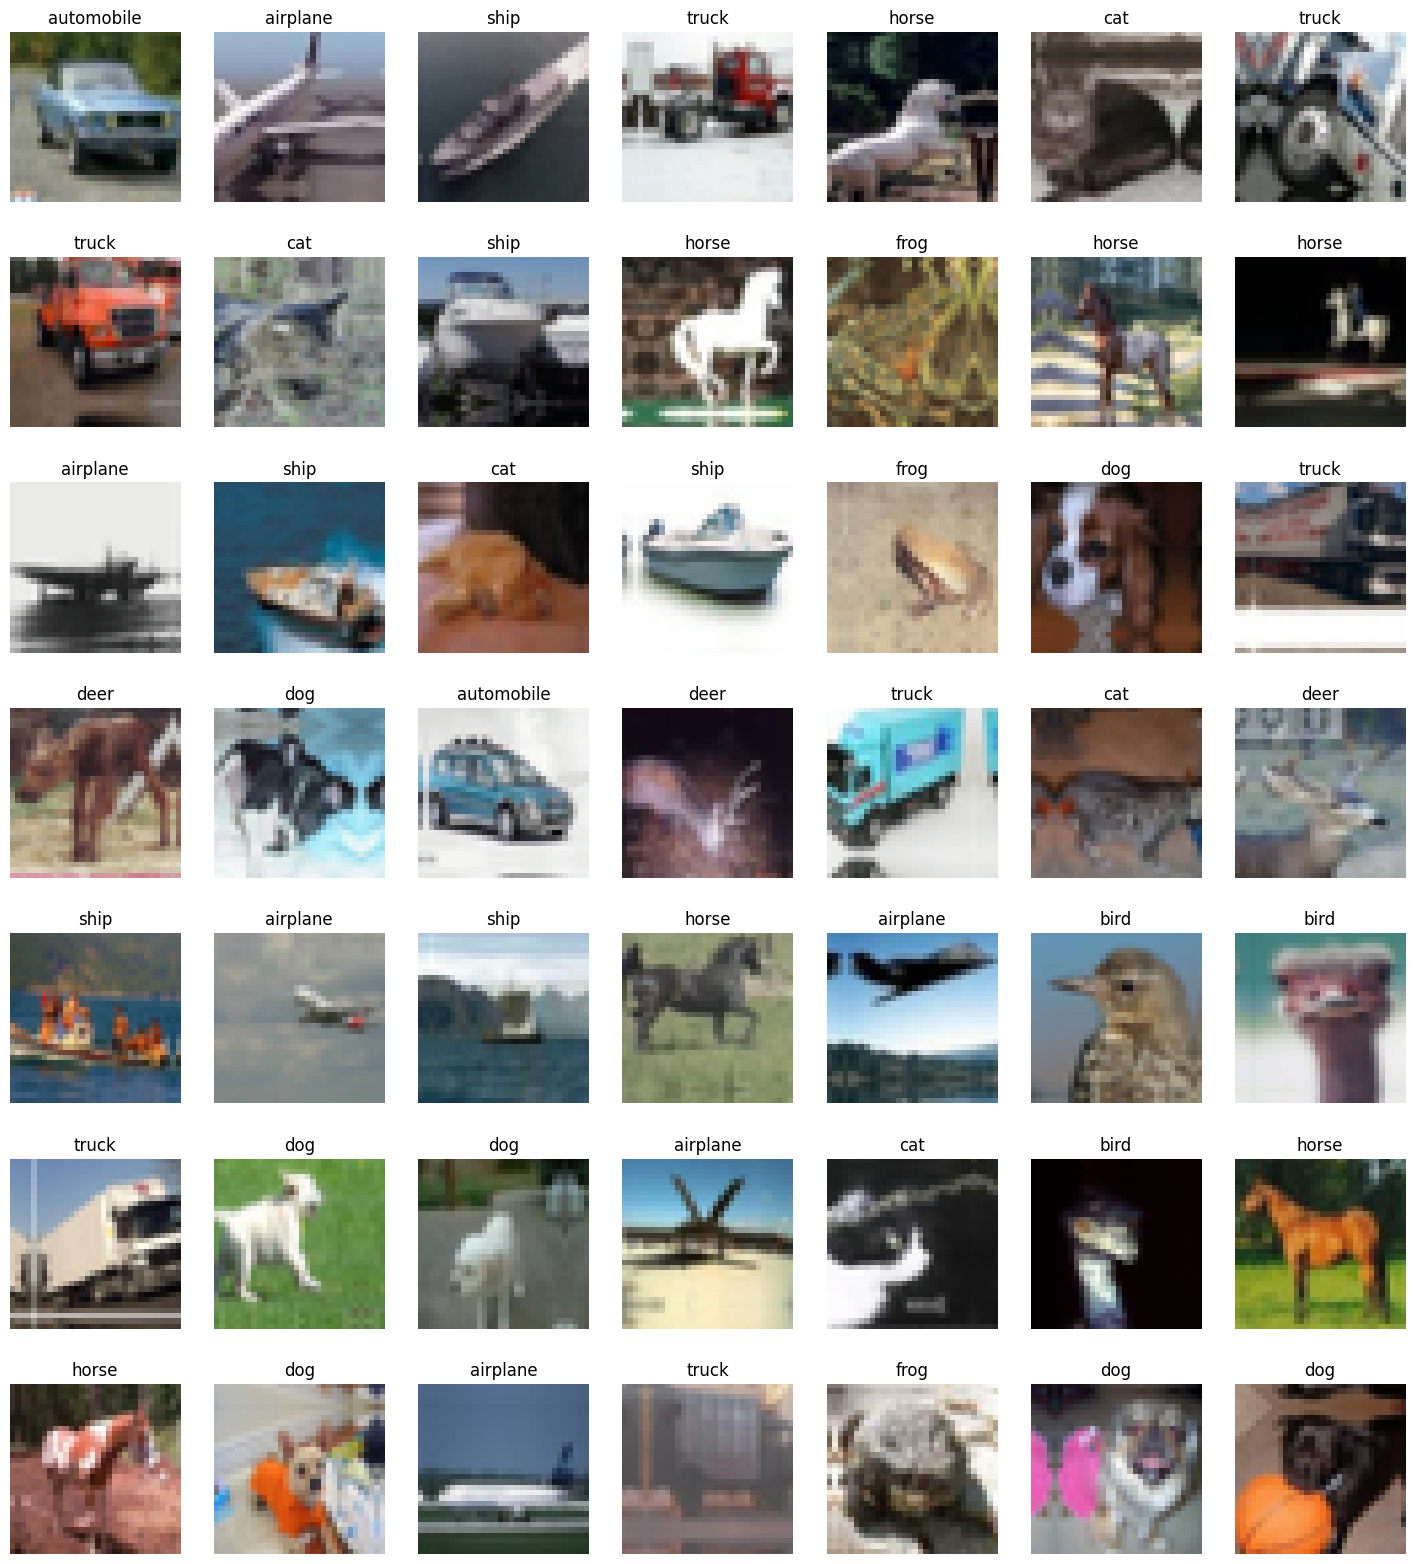

In [5]:
N = 7
M = 7
size = (18,20)

fig, axs = plt.subplots(M, N, figsize=size)
for i in range(M):
    for j in range(N):
        # random image index 
        rand_idx = np.random.randint(len(Cifar10_train)-1)
        
        # get a sample from train set
        img, GT, _ = Cifar10_train[rand_idx]
        class_name = CIFAR10_labels[GT]
        img = ConvertToPlotableImage(img, [0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]) 
        
        # plot 
        axs[i,j].imshow(img)
        axs[i,j].set_title(class_name)
        axs[i,j].axis('off')

# Load CIFAR-100 Dataset

In [13]:
# create datasets 
Cifar100_train = get_cifar100('train', Dataset_dir = '/home/chitraz/Documents/UoS_MSc/EEEM056_Project/Experiments/dataset')
Cifar100_test = get_cifar100('test', Dataset_dir = '/home/chitraz/Documents/UoS_MSc/EEEM056_Project/Experiments/dataset')

print('{} train samples. {} test samples'.format(len(Cifar10_train), len(Cifar10_test)))


50000 train samples. 10000 test samples


### Plot a NxM grid of CIFAR-100 test samples

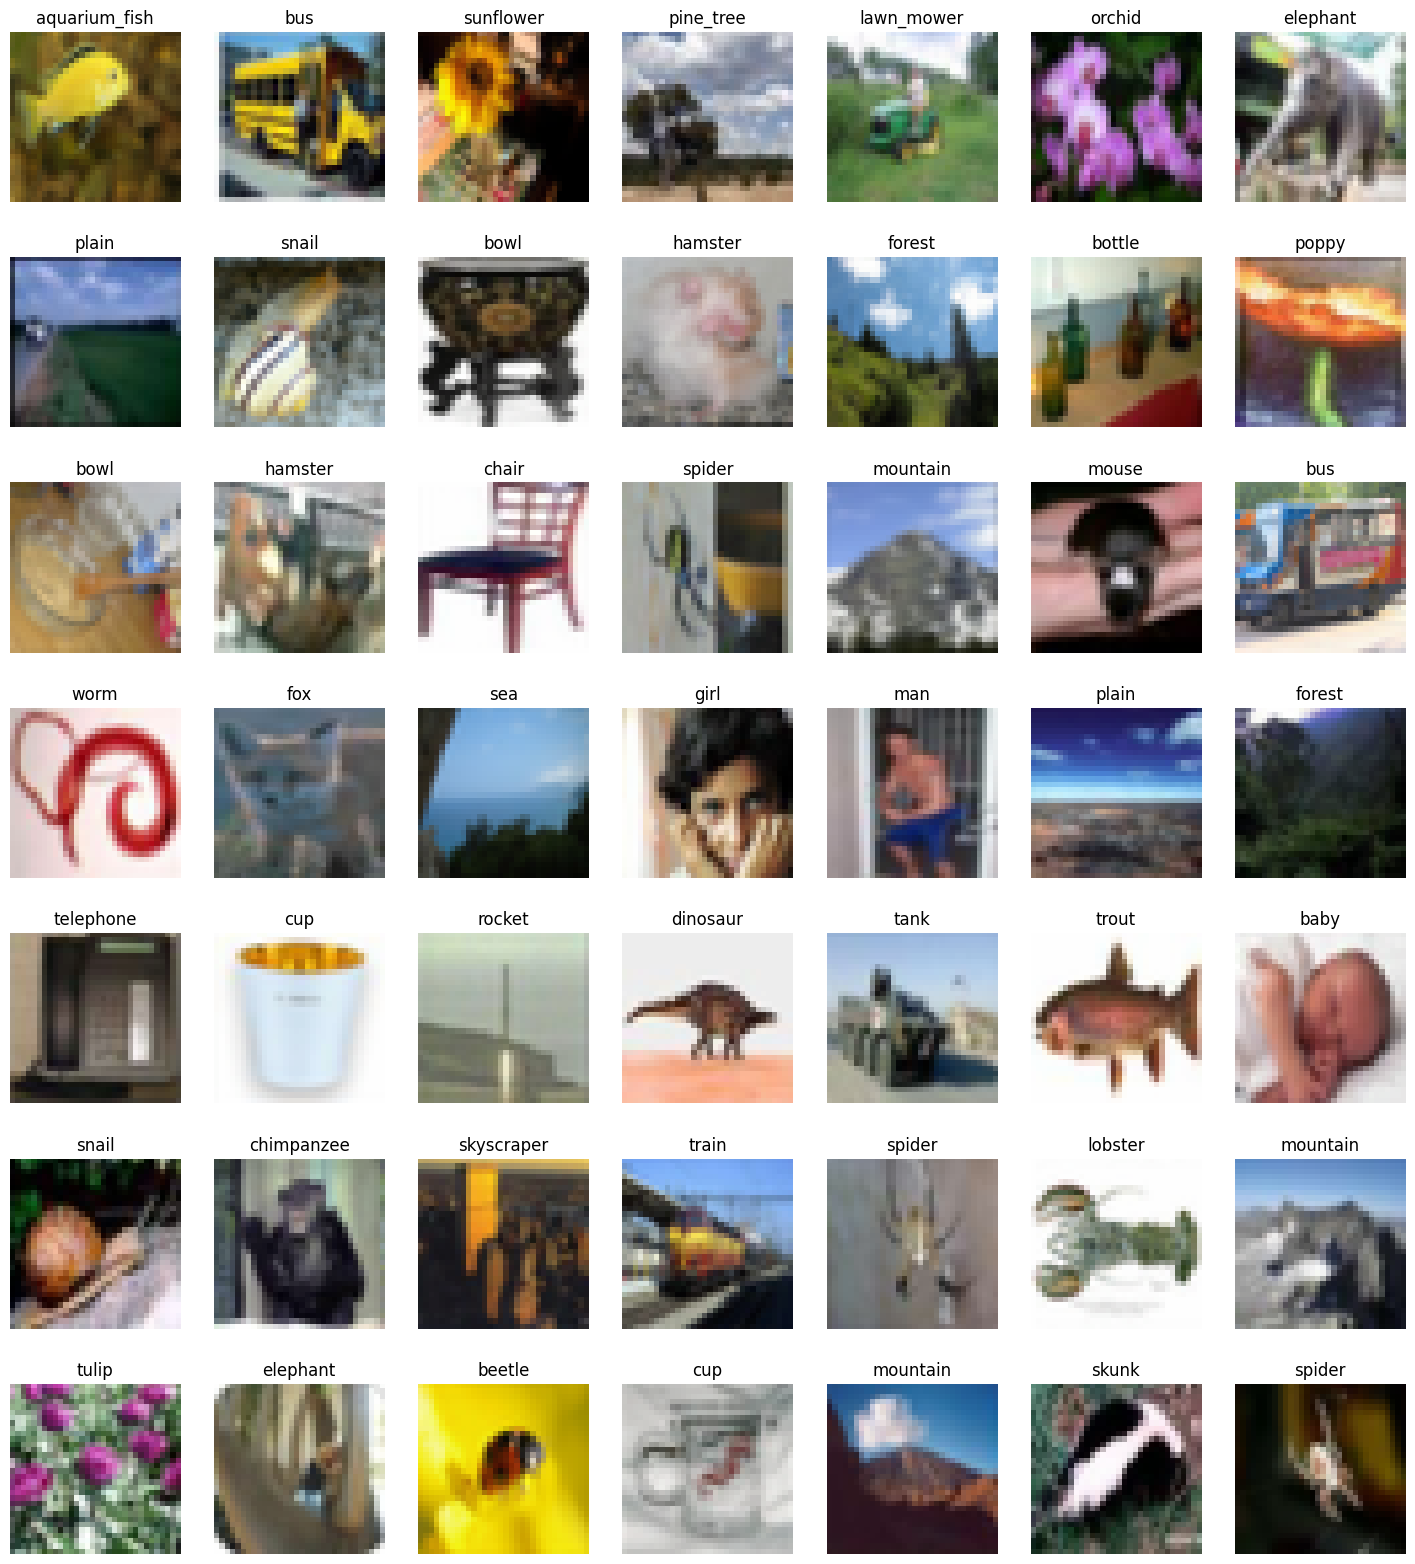

In [14]:
N = 7
M = 7
size = (18,20)

fig, axs = plt.subplots(M, N, figsize=size)
for i in range(M):
    for j in range(N):
        # random image index 
        rand_idx = np.random.randint(len(Cifar100_test)-1)
        
        # get a sample from train set
        img, GT, _ = Cifar100_test[rand_idx]
        class_name = CIFAR100_Fine_labels[GT]
        img = ConvertToPlotableImage(img, [0.5071, 0.4867, 0.4408], [0.2675, 0.2565, 0.2761]) 
        
        # plot 
        axs[i,j].imshow(img)
        axs[i,j].set_title(class_name)
        axs[i,j].axis('off')

### Plot a NxM grid of CIFAR-100 train samples

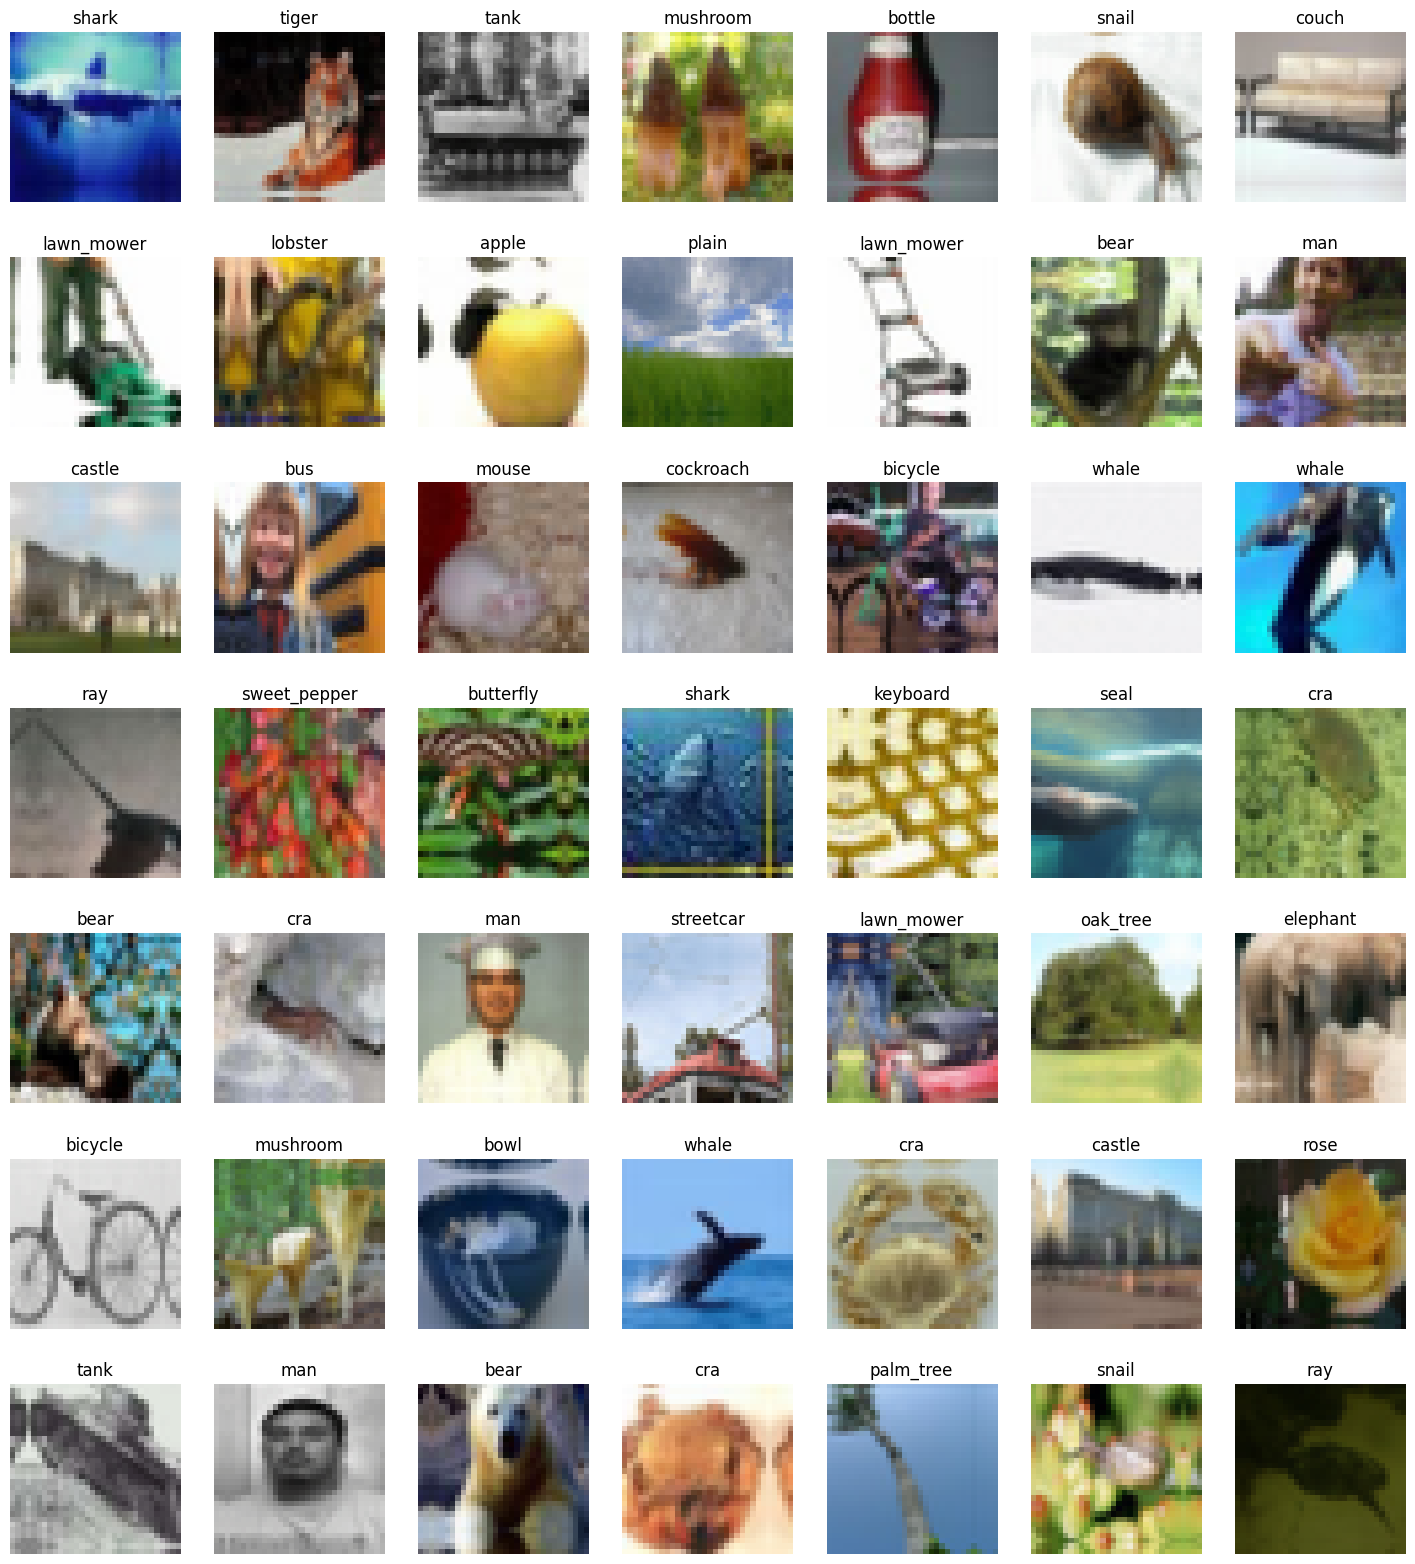

In [15]:
N = 7
M = 7
size = (18,20)

fig, axs = plt.subplots(M, N, figsize=size)
for i in range(M):
    for j in range(N):
        # random image index 
        rand_idx = np.random.randint(len(Cifar100_train)-1)
        
        # get a sample from train set
        img, GT, _ = Cifar100_train[rand_idx]
        class_name = CIFAR100_Fine_labels[GT]
        img = ConvertToPlotableImage(img, [0.5071, 0.4867, 0.4408], [0.2675, 0.2565, 0.2761]) 
        
        # plot 
        axs[i,j].imshow(img)
        axs[i,j].set_title(class_name)
        axs[i,j].axis('off')